 # Graduate Rotational Internship Program by The Sparks Foundation

### Author: Fahad Munir

### Task 5
## Exploratoy Data Analysis-Sports

This task is part of the internship with The Sparks Foundation. In this task we have to analyze the Global Terrorism dataset in order to find out hotpots of terrorism. As a sports analytics, find out the most successful teams, players and factors contributing win or loss of a team.

In [1]:
# Importing libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
match_data = pd.read_csv('E:\\The Sparks Foundation\\Indian Premier League\\matches.csv')
match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [2]:
#Reading ballbyball dataset
deliveries_data = pd.read_csv('E:\\The Sparks Foundation\\Indian Premier League\\deliveries.csv')
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


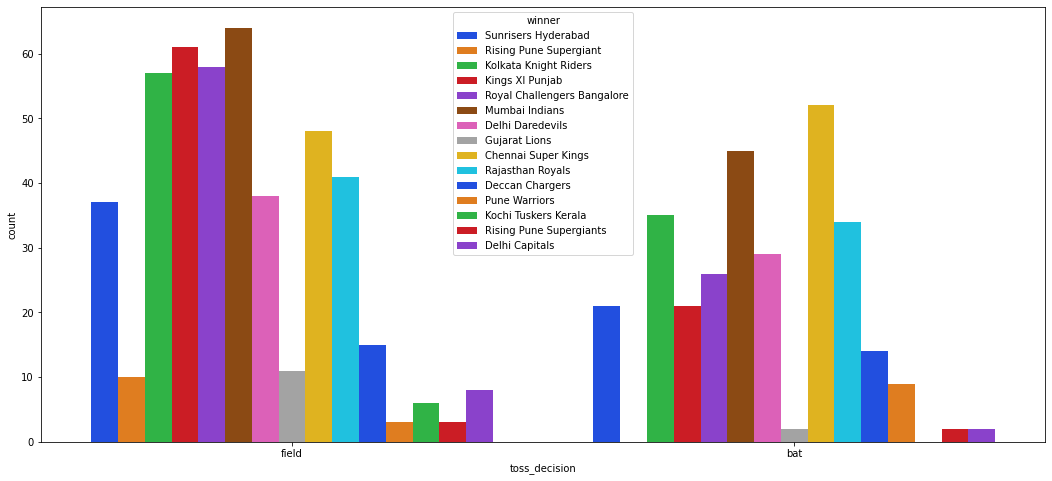

In [4]:
plt.figure(figsize=(18,8))
pal = sns.color_palette("bright", len(match_data))
sns.countplot('toss_decision', data = match_data, palette = pal, hue='winner')

From the above plot we can infer, Mumbai Indians have won most (more than 60 matches) when they fielded first. Kings XI Punjab also won around 60 matches when they fielded first. On the other hand, Chennai Super Kings have won more when they have batted first compare to fielding first decision.


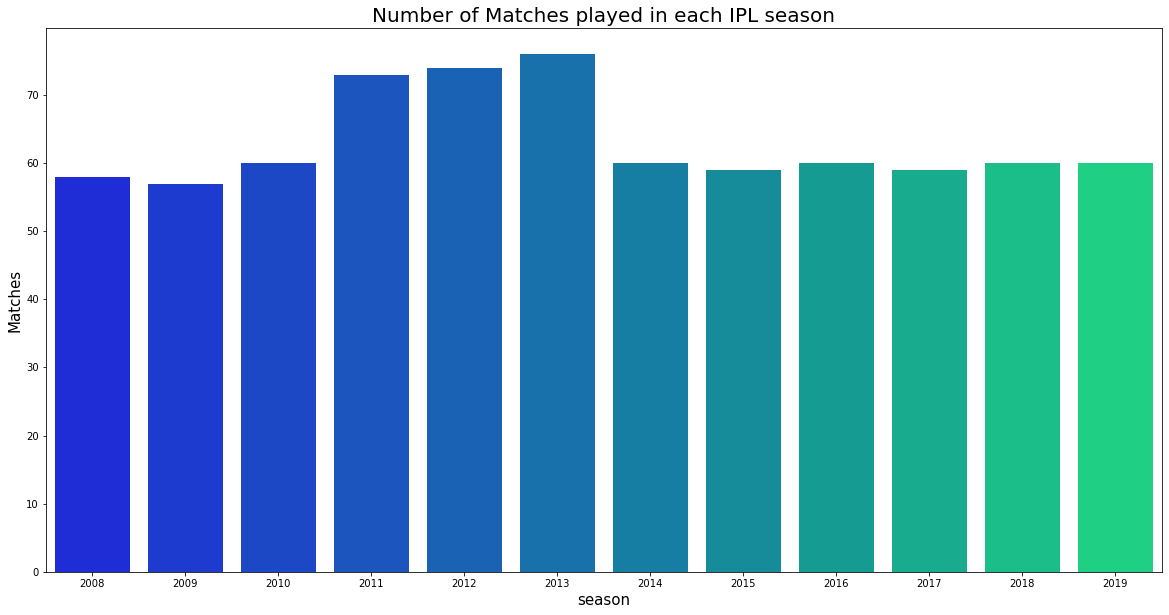

In [76]:
plt.figure(figsize = (20,10))
sns.countplot('season',data=match_data,palette="winter")
plt.title("Number of Matches played in each IPL season",fontsize=20)
plt.xlabel("season",fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.show()

In [72]:
match_data['win_by']=np.where(match_data['win_by_runs']>0,'Bat first','Bowl first')

<ipython-input-75-2c68b0041383>:9: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis('equal',fontsize=10)


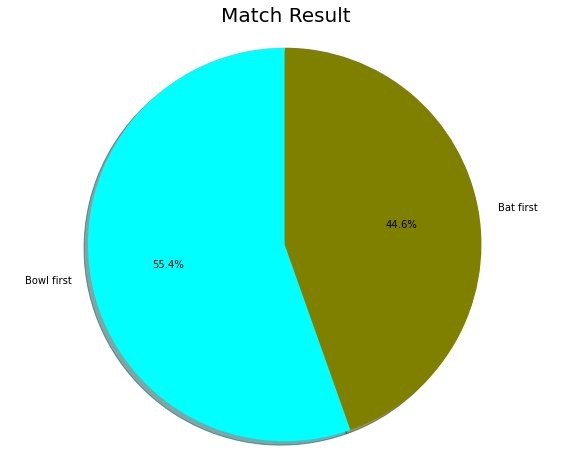

In [75]:
Win=match_data.win_by.value_counts()
labels=np.array(Win.index)
sizes = Win.values
colors = ['#00FFFF', '#808000']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

## How Toss win effect match result?
 Let's try to figure out how toss result effect the result of the match.

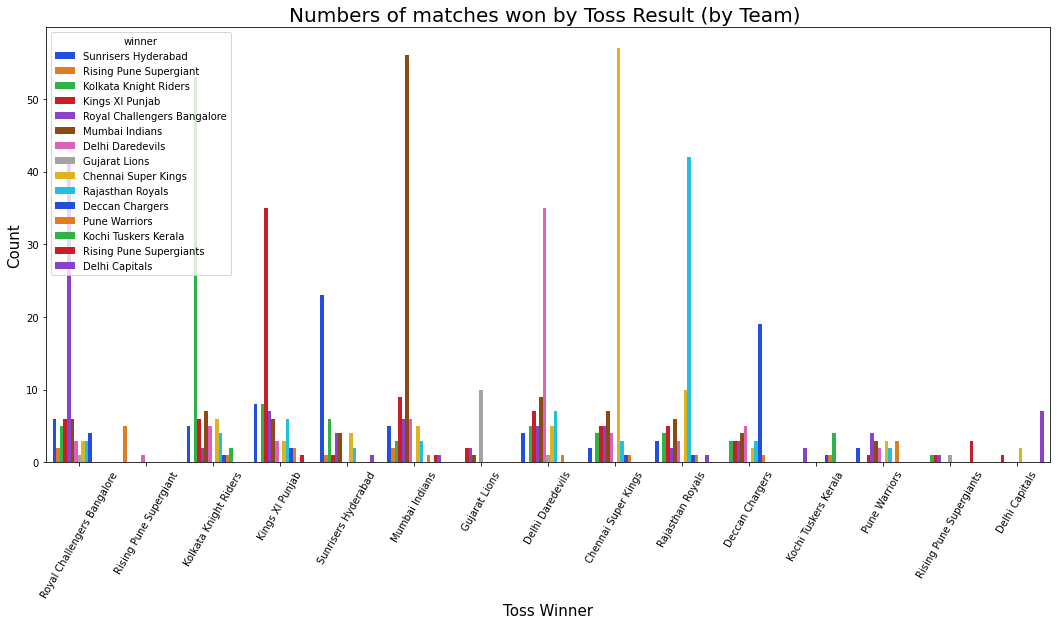

In [5]:
plt.figure(figsize=(18,8))
pal = sns.color_palette("bright", len(match_data))
sns.countplot('toss_winner', data = match_data, palette = pal, hue='winner')
plt.title("Numbers of matches won by Toss Result (by Team) ",fontsize=20)
plt.xlabel("Toss Winner",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=60)
plt.show()


#### From the above plot we can infer, Chennai Super Kings and Mumbai Indians have taken advantage of their toss win most of the time by winning the match. Kolkata Knight Riders, Royal Challengers Bangalore and Rajasthan Royal comes after that in terms of descending order.

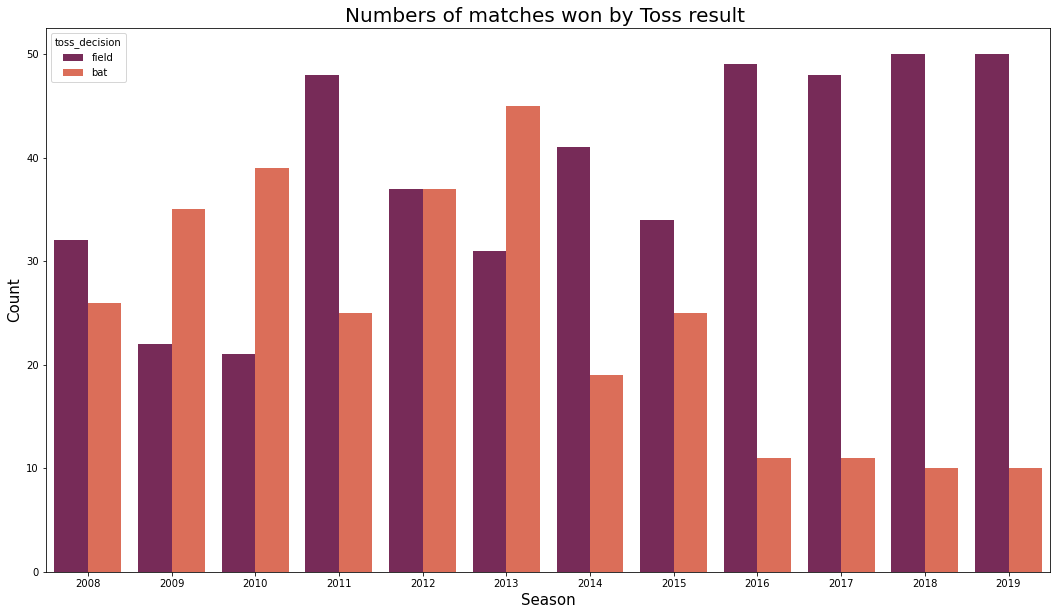

In [67]:
# we will plot graph on Numbers of matches won by Toss result
plt.figure(figsize = (18,10))
sns.countplot('season',hue='toss_decision',data=match_data,palette='rocket')
plt.title("Numbers of matches won by Toss result ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()


In [8]:
deliveries_data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
season_data = match_data[['id', 'season', 'winner']]
complete_data = deliveries_data.merge(season_data, how='inner', left_on = 'match_id', right_on = 'id')

In [10]:
match_data.columns.values

array(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'], dtype=object)

In [11]:
match_data = match_data.drop(columns=["umpire3"],axis=1)

match_data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


## Most Successful Teams

In [12]:
wins_per_season = match_data.groupby("season")["winner"].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [13]:
#Champion teams by Season

final_matches = match_data.drop_duplicates(subset=['season'], keep='last')
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


<ipython-input-14-614cb8bb7218>:10: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis('equal',fontsize=10)


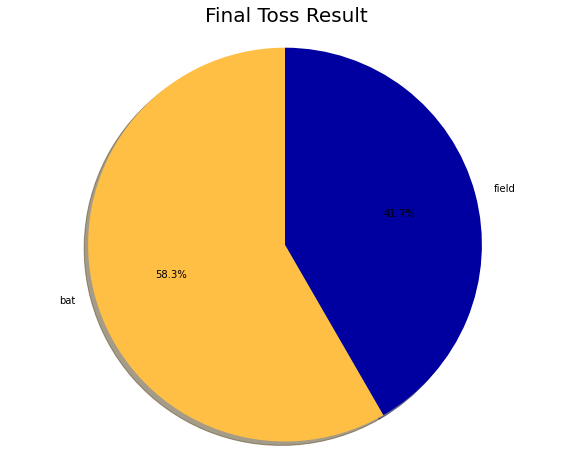

In [14]:
#Toss Result in Final
Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF44', '#0000A0']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Final Toss Result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

In [22]:
# Let's print toss winner, toss decision, winner in final matches.
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [23]:
len(final_matches[final_matches['toss_winner']==final_matches['winner']]['winner'])

9

#### Nine champion team have won the toss in the final.

In [20]:
# Best teams based on Championships
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [41]:
# Let's print IPL Finals venues and winners along with the number of wins.
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

### Top Players of IPL

<Figure size 1296x720 with 0 Axes>

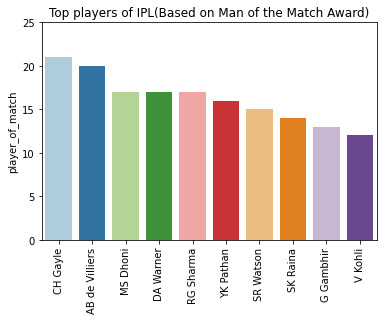

In [18]:
plt.figure(figsize=(18,10))
top_players = match_data.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,25])
ax.set_ylabel('Count')
ax.set_title('Top players of IPL(Based on Man of the Match Award)')
top_players.plot.bar()
sns.barplot(x = top_players.index, y=top_players, orient = 'v', palette = 'Paired')
plt.show()

In [35]:
# Let's print numbers of fours hit by team
four_data=complete_data[complete_data['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


In [34]:
# Let's print numbers of six hit by team
six_data=complete_data[complete_data['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('six','count')])

,runs by fours,six
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


## Individual Performance Data

In [25]:
#Player of the match award winner in final matches
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


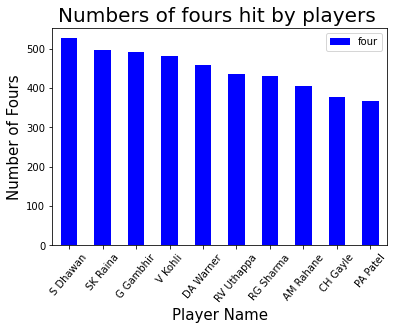

In [42]:
#Highest number of four's hit by players
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='blue')
plt.title("Numbers of fours hit by players ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player Name",fontsize=15)
plt.ylabel("Number of Fours",fontsize=15)
plt.show()

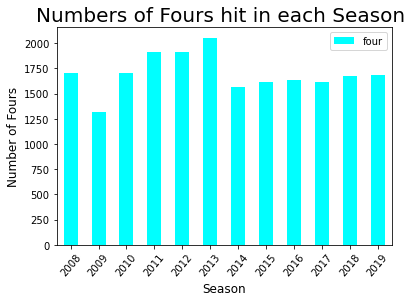

In [49]:
# Let's plot graph on no of fours hit in each season
ax=four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = 'cyan')
plt.title("Numbers of Fours hit in each Season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Season",fontsize=12)
plt.ylabel("Number of Fours",fontsize=12)
plt.show()

#### We can see highest number of fours has been hitted in the year of 2013.

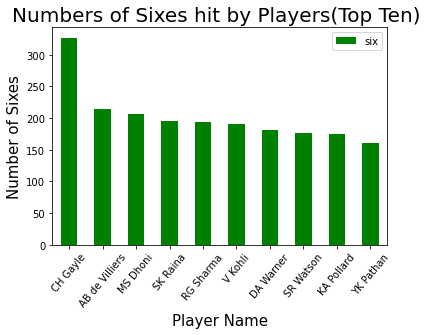

In [40]:
#Highest number of Six hit by players(Top Ten)
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax1=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='Green')
plt.title("Numbers of Sixes hit by Players(Top Ten) ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player Name",fontsize=15)
plt.ylabel("Number of Sixes",fontsize=15)
plt.show()

### We can see, Chris Gayle is miles away from others in terms of Six hitting as he is the only one to hit more than 300 sixes.

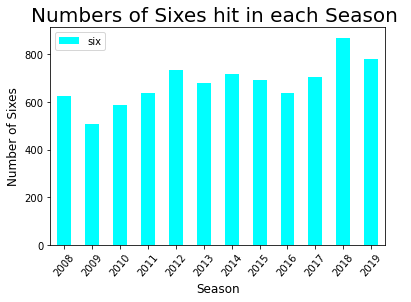

In [46]:
# Let's plot graph on no of six hit in each season
ax=six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color = 'cyan')
plt.title("Numbers of Sixes hit in each Season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Season",fontsize=12)
plt.ylabel("Number of Sixes",fontsize=12)
plt.show()

We can see the most number of six has been hitted in 2018.

## Leading Run Scorers, Highest number of Matches played and Highest Wicket Takers.

In [50]:
# Top Ten Leading run scorers of IPL
batsman_score = deliveries_data.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("Top 10 Leading Run Scorer in IPL")
batsman_score.iloc[:10,:]

Top 10 Leading Run Scorer in IPL


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [58]:
#Players who played most number of matches
# we will print no of matches played by batsman
No_Matches_Player= deliveries_data[["match_id","player_dismissed"]]
No_Matches_Player =No_Matches_Player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_Player.columns=["batsman","No_of Matches"]
No_Matches_Player .head(5)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


In [59]:
#Let's Analyze the wickets data
wickets_data = deliveries_data.dropna(subset=['dismissal_kind'])
wickets_data=wickets_data[~wickets_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [63]:
#Let's see who are the highest wicket takers in IPL history
wickets_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True)

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
...,...,...
343,BMAJ Mendis,1
344,TP Sudhindra,1
345,LA Carseldine,1
346,S Vidyut,1


## We can infer from the above tables, Virat Kohli is the highest runscorer, Lasith Malinga is the highest wicket taker and Suresh Raina played the most number of matches in IPL history.

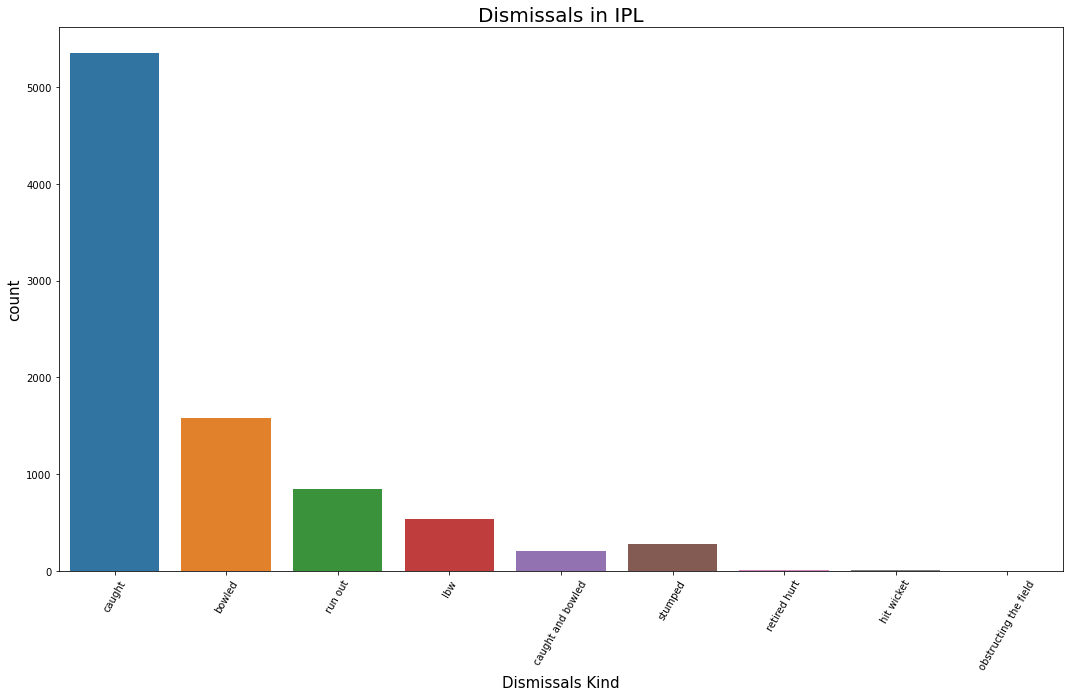

In [66]:
# Dismissals in IPL (by different kind)
plt.figure(figsize=(18,10))
ax=sns.countplot(deliveries_data.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals Kind",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=60)
plt.show()

## Conclusion

Let's conclude with some insights found in this visualizations and tables:

- Most number of matches played in the 2013 season
- Bowl first have slight advantage in terms of winning games accoeding to data.
- Toss winning is vital in IPL final as 9 teams in 12 seasons have won the championship after winning the toss.
- Chris Gayle grabbed the highest number of player of the match award followed by AB de Villiers.
- Chris Gayle also scored highest number of sixes.
- Shikhar Dhawan Scored the highest number of fours.
- Lasith Malinga is the highest wicket taker.
- Virat Kohli is the highest run score.
- Suresh Raina played the most number of matches followed by Rohit Sharma.


